# Анализ пользовательских покупок продуктового магазина, поиск наиболее частых паттернов товаров, для оптимизации размещения продуктов в магазине.

## Исходные данные - выгрузка информации о покупках, где:

- id – означает покупку (в одну покупку входят все товары, купленные пользователем во время 1 похода в магазин)
- Товар – наименование товара
- Количество – число единиц купленного товара

Формат представления исходных данных - текстовый файл csv.


## Требования к структуре результирующей таблицы:

- 1_Товар – наименование первого товара
- 2_Товар – наименование второго товара
- Встречаемость – число раз, когда такая пара была встречена

### 1 - Загрузка необходимых библиотек

In [163]:
import pandas as pd
import missingno as msno

import collections
import itertools
from itertools import combinations
from collections import Counter

import seaborn as sns

### 2- Предварительный анализ

In [164]:
#загрузка данных в датафрейм data

data = pd.read_csv(r'C:\Users\MiPro\Desktop\_AnaliticaCourse_II\final_project\test1_completed.csv')

In [165]:
#посмотрим на структуру наших данных
data.shape

(43514, 3)

таблица содержит 3 столбца и 43514 строк

In [166]:
#для ознакомления с общим видом исходной таблицы выведем первые 5 строк

data.head(5)

,id,Товар,Количество
0,17119,Лимон,1.1
1,17119,Лимон оранжевый,0.7
2,17119,Лук-порей,10.0
3,17119,Лук репчатый,2.5
4,17119,Малина свежая,1.0


In [167]:
#таблица имеет 3 колонки, 2 из которых имеют кириллические названия
#переименуем колонки в названия с латинскими символами

data = data.rename(columns = {'Товар':'tovar', 'Количество':'num'})

In [168]:
#Проверим исходные данные на наличие пропусков

In [169]:
data.isna().sum()

id       0
tovar    0
num      0
dtype: int64

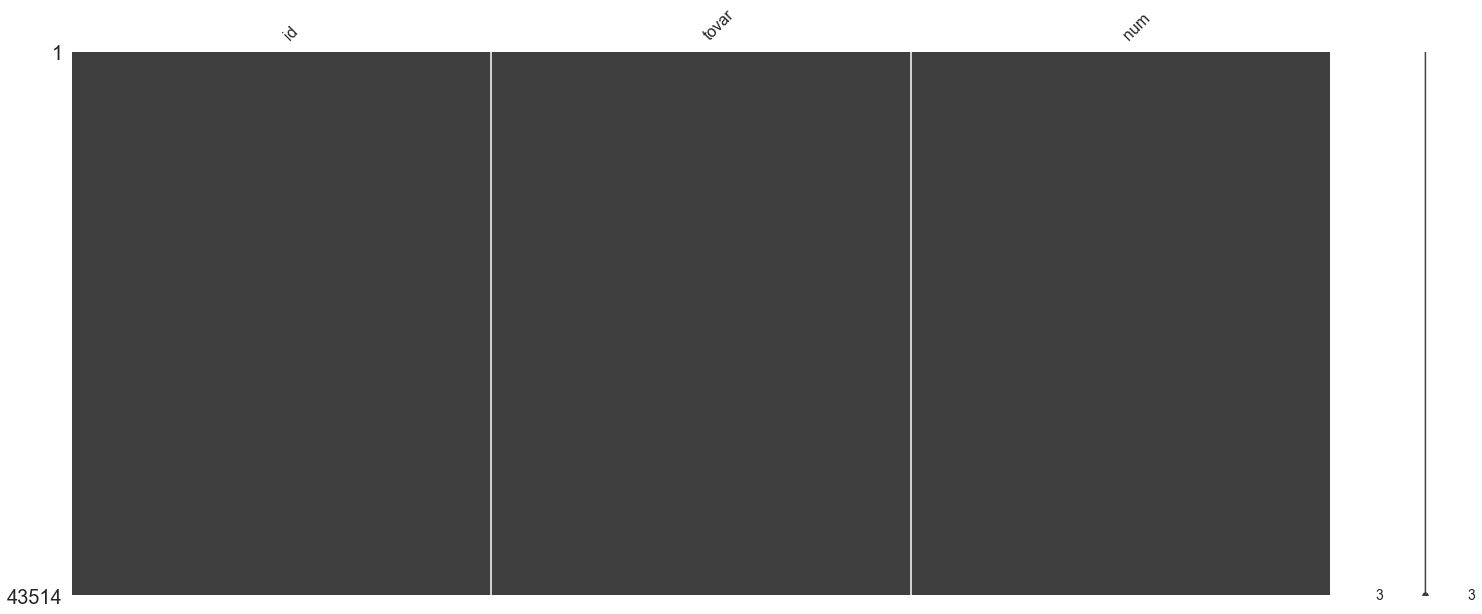

In [170]:
#ещё один наглядный способ проверки на пропуски - визуализация пропущенных значений с помощью библиотеки missingno
msno.matrix(data)

В исходной таблице нет пропущенных значений, можно переходить к дальнейшему анализу

In [171]:
#посмотри какое количество уникальных товаров представлено в таблице
data['tovar'].nunique() 

199

Ассортимент магазина содержит практически 200 продуктовых товаров

In [172]:
#Так как ассортимент не очень большой посмотрим, что он содержит и выведем уникальные названия товаров
data['tovar'].unique()

array(['Лимон', 'Лимон оранжевый', 'Лук-порей', 'Лук репчатый',
       'Малина свежая', 'Морковь немытая', 'Черешня сушеная',
       'Изюм Султана', 'Капуста цветная', 'Бразильский орех',
       'Дыня Гуляби', 'Шпинат мини', 'Изюм Голд', 'Огурцы Луховицкие',
       'Чеснок весовой', 'Огурцы Белоруссия', 'Черешня отборная',
       'Абрикосы молдавские', 'Кукуруза мини', 'Грибы лисички',
       'Слива Президент', 'Апельсины столовые', 'Кукуруза свежая',
       'Салат Руккола', 'Гранат', 'Подпись открытки', 'Лук зеленый',
       'Цукаты (брусочки)', 'Кокос питьевой', 'Петрушка',
       'Помидоры Парадайз', 'Ягоды Годжи', 'Укроп', 'Черника свежая',
       'Персики', 'Арбуз', 'Салат Айсберг', 'Галангал корень',
       'Петрушка Кудрявая', 'Яблоки Гала', 'Курага коричневая',
       'Горох стручковый', 'Персики узбекские', 'Персик сушеный',
       'Груша Форел', 'Яблоки Айдаред', 'Яблоки Симиренко', 'Кабачки',
       'Кинза', 'Морковь мытая', 'Капуста Кольраби', 'Груша Аббат',
       'Шпинат'

Как видим продукты, содержащиеся в таблице представляют собой овощи, фрукты, травы.

Некоторые сомнения вызывает товар с названием 'Подпись открытки'. Возможно, некорректный перевод...

### 3 - Поиск продуктов, наиболее часто покупаемых вместе

Перейдем к поиску ответа на оcновной впорос - какие продукты покупают одновременно наиболее часто?

In [173]:
#указываем какое количество товаров должно содержаться в группе - 2
#создаем все возможные комбинации товаров по 199 имеющимся товарам
#считаем встречаемость паттернов в покупках

agg_ = lambda x: tuple(itertools.combinations(x, 2))
product = list(itertools.chain(*data.groupby('id').agg({'tovar': lambda x: agg_(sorted(x))}).tovar))

counts = Counter(product)

In [174]:
data_count = pd.DataFrame(list(counts.items()), columns=['combination', 'count'])

In [175]:
data_count.head()

,combination,count
0,"(Лимон, Лимон оранжевый)",31
1,"(Лимон, Лук репчатый)",114
2,"(Лимон, Лук-порей)",40
3,"(Лимон, Малина свежая)",25
4,"(Лимон, Морковь немытая)",80


Преобразуем полученную таблицу к виду: Товар1, Товар2, встречаемость

In [176]:
data_count[['1_Товар','2_Товар']] = pd.DataFrame(data_count.combination.tolist(), index= data_count.index)

In [177]:
data_count.head()

,combination,count,1_Товар,2_Товар
0,"(Лимон, Лимон оранжевый)",31,Лимон,Лимон оранжевый
1,"(Лимон, Лук репчатый)",114,Лимон,Лук репчатый
2,"(Лимон, Лук-порей)",40,Лимон,Лук-порей
3,"(Лимон, Малина свежая)",25,Лимон,Малина свежая
4,"(Лимон, Морковь немытая)",80,Лимон,Морковь немытая


In [178]:
data_count = data_count.rename(columns = {'count':'Встречаемость'})

In [179]:
data_count = data_count[['1_Товар', '2_Товар', 'Встречаемость']]

In [180]:
#результирующая таблица встречаемости пар одновременно покупаемых товаров

data_count

,1_Товар,2_Товар,Встречаемость
0,Лимон,Лимон оранжевый,31
1,Лимон,Лук репчатый,114
2,Лимон,Лук-порей,40
3,Лимон,Малина свежая,25
4,Лимон,Морковь немытая,80
...,...,...,...
19692,"Букет ""Оранж""",Пекан очищенный,7
19693,Алыча вяленая,Пекан очищенный,6
19694,Мангостин свежий,Тимьян (чабрец),2
19695,Алыча вяленая,Тамарилло,2


In [181]:
#Посмотрим, какие товары покупаются одновременно наиболее часто, для этого отсортируем паттерны по колонке встречаемости
#по возрастанию

data_count = data_count.sort_values(by = 'Встречаемость', ascending = False)

In [182]:
#топ 5 наиболее распространенных паттернов одновременных покупок

data_count.head(5)

,1_Товар,2_Товар,Встречаемость
266,Огурцы Луховицкие,Укроп,431
283,Петрушка,Укроп,408
3630,Арбуз,Огурцы Луховицкие,345
855,Кабачки,Огурцы Луховицкие,326
480,Кинза,Укроп,303


## 4 - Выводы

Топ 5 паттернов - пары продуктов, одновременно купленных более 300 раз.
Эти патеррны состоят из наиболее распространенных и часто покупаемых трав и овощей: укроп, лук, петрушка, кинза, огурцы.
Чаще всего продуктовые магазины имеют специализированные овощные отделы, холодильники с травами целесообразно располагать в непосредственной близости от них для удобства покупателей.

In [183]:
#посмотрим на общую статистику по колонке Встречаемость

data_count['Встречаемость'].describe()

count    19697.000000
mean        19.551708
std         19.821458
min          1.000000
25%         10.000000
50%         14.000000
75%         22.000000
max        431.000000
Name: Встречаемость, dtype: float64

Средняя встречаемость паттернов составляет 19 (среднее), 14 (медиана)

Для более подробного изучения парных покупок создадим новую таблицу и добавим в нее колонку с разделением частоты встречаемости паттернов в покупках на группы:
 - менее 10 раз
 - 10-20
 - 20-50
 - 50-100
 - более 100
    

In [184]:
data_count_cat = data_count

In [185]:
labels=["менее 10 раз", "10-20", "20-50", "50-100","более 100 раз"]
bins=[-np.inf,10,20,50,100, np.inf]
data_count_cat['Группа'] = pd.cut(data_count_cat['Встречаемость'], bins=bins, labels=labels,right=False) 

In [186]:
data_count_cat.head(15)

,1_Товар,2_Товар,Встречаемость,Группа
266,Огурцы Луховицкие,Укроп,431,более 100 раз
283,Петрушка,Укроп,408,более 100 раз
3630,Арбуз,Огурцы Луховицкие,345,более 100 раз
855,Кабачки,Огурцы Луховицкие,326,более 100 раз
480,Кинза,Укроп,303,более 100 раз
234,Лук зеленый,Укроп,300,более 100 раз
261,Огурцы Луховицкие,Петрушка,286,более 100 раз
238,Лук репчатый,Огурцы Луховицкие,285,более 100 раз
573,Баклажаны грунтовые,Кабачки,284,более 100 раз
463,Кабачки,Укроп,281,более 100 раз


In [187]:
#посмотрим на частоту встречаемость выделенных групп

data_tab = data_count_cat['Группа'].value_counts()

In [188]:
data_tab.sort_values()

более 100 раз     189
50-100            869
менее 10 раз     4452
20-50            4698
10-20            9489
Name: Группа, dtype: int64

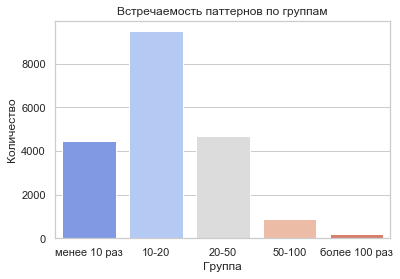

In [193]:
ax = sns.countplot(x="Группа", data=data_count_cat, palette="coolwarm")
ax.set(xlabel="Группа", ylabel = "Количество", title="Встречаемость паттернов по группам")
vals = ax.get_yticks()

Из графика видно, что наиболее многочисленная группа паттернов - пары товаров, которые купили 10-20 раз.
Группа паттернов, которые купили одновременно более 100 раз - наименее многочисленная.
Другими словами - люди часто покупают одновременно не очень много групп товаров, чаще всего эти группы состоят из пары овощи (огурцы, кабачки, помидоры) + травы или наиболее популярных трав (лук, петрушка и т.д.). 